### Student Information
Name: 黃昱霖

Student ID: 108061539

GitHub ID: YulinHuang0923

Kaggle name: Yulin (Team Name: QQ)

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM19-Lab2-Master Repo](https://github.com/EvaArevalo/DM19-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/179d01d4dd984fc5ac45a894822479dd) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Nov. 23rd 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM19-Lab2-Homework](https://github.com/EvaArevalo/DM19-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th 11:59 pm, Tuesday)__. 

---
### Begin Assignment Here

---
## 1. Data Preparation

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("../DM19-Lab2-Master/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("../DM19-Lab2-Master/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("../DM19-Lab2-Master/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("../DM19-Lab2-Master/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("../DM19-Lab2-Master/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("../DM19-Lab2-Master/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("../DM19-Lab2-Master/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("../DM19-Lab2-Master/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

---
### ** >>> Exercise 1 (Take home): **
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [5]:
# Answer here
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

def counter(X_df, num=30):
    # pick top 30 words
    count_vect = CountVectorizer(max_features=num)
    X_counts = count_vect.fit_transform(X_df.text)
    # count frequencies
    term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
    return count_vect, term_frequencies

def plot(count_vect, term_frequencies, title):
    plt.subplots(figsize=(12, 8))
    g = sns.barplot(x=count_vect.get_feature_names(), 
            y=term_frequencies)
    g.set_title(title, fontsize=20)
    g.set_xticklabels(count_vect.get_feature_names(), rotation=90, fontsize=15)
    plt.show()

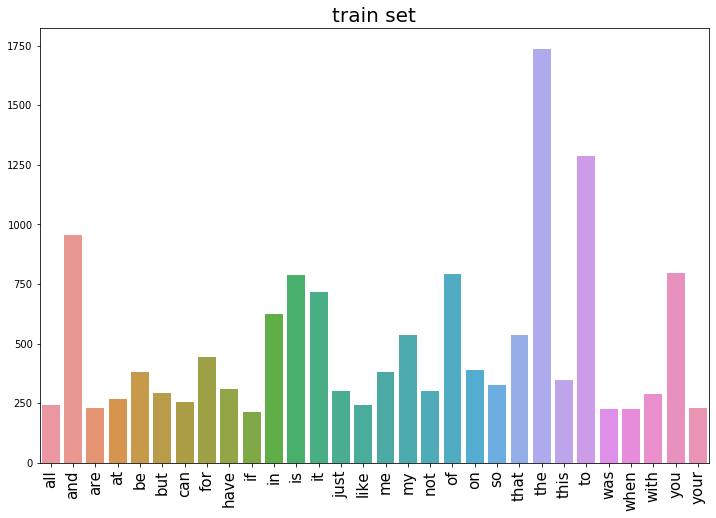

In [6]:
# train set
count_vect_train, term_frequencies_train = counter(train_df, num=30)
plot(count_vect_train, term_frequencies_train, 'train set')

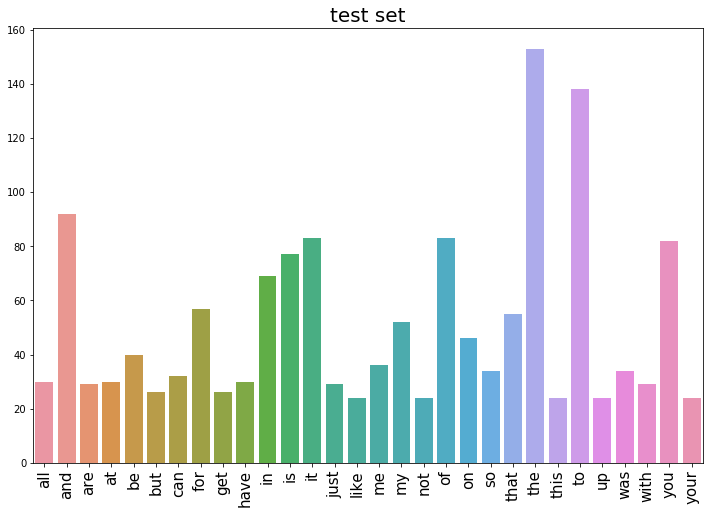

In [7]:
# test set
count_vect_test, term_frequencies_test = counter(test_df, num=30)
plot(count_vect_test, term_frequencies_test, 'test set')

---
## 2. Feature engineering

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [8]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

# build analyzers (tf-idf)
TFIDF_1000 = TfidfVectorizer(max_features=1000)
# apply analyzer to training data
train_data_tfidf = TFIDF_1000.fit_transform(train_df['text']) 

In [9]:
# observe feature names [100:110]
feature_names_1000 = TFIDF_1000.get_feature_names()
feature_names_1000[100:110]

['bitter',
 'black',
 'blacks',
 'blame',
 'blessed',
 'blood',
 'bloody',
 'blues',
 'body',
 'boiling']

---
## 3. Model

In [10]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

In [11]:
from sklearn.tree import DecisionTreeClassifier

## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

In [12]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.64


In [13]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report
print('training result')
print(classification_report(y_true=y_train, y_pred=y_train_pred))
print('testing result')
print(classification_report(y_true=y_test, y_pred=y_test_pred))

training result
              precision    recall  f1-score   support

       anger       0.97      1.00      0.98       857
        fear       0.98      1.00      0.99      1147
         joy       1.00      1.00      1.00       823
     sadness       1.00      0.94      0.97       786

    accuracy                           0.99      3613
   macro avg       0.99      0.98      0.99      3613
weighted avg       0.99      0.99      0.99      3613

testing result
              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.62      0.64      0.63       110
         joy       0.67      0.68      0.68        79
     sadness       0.61      0.57      0.59        74

    accuracy                           0.64       347
   macro avg       0.64      0.64      0.64       347
weighted avg       0.64      0.64      0.64       347



In [14]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 16  9  4]
 [15 70  9 16]
 [ 5 13 54  7]
 [ 9 14  9 42]]


---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

#### Ans:
1. First of all, we take a look at the accuracy. With a high training accuracy 0.99 (almost perfect), the model is powerful enough to learn from the trianing data, meaning that it does not encounter an underfitting problem. However, it might be overfitting, which we have no way of knowing only with the final test accuracy.
2. Next, we analysis the classification report. By the value in support, we can see that it is an unbalanced dataset (fear is much larger). But, with a simliar value in precision [tp / (tp+fp)] and recall [tn / (tn+fn)], the prediction in each class is in a quite neutral sense, which means it doesn't have a tendency to accept nor reject an observation in each class.
3. Last, but not the least, by observing the confusion matrix and macro avg, which interpret the prediction performance in each class. We can learn that the prediction is not apt to any classes, result in a close result in macro avg accuracy and weighted avg accuracy.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [15]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

# build model and train
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)

# test result
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

In [16]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.72


In [17]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print('training result')
print(classification_report(y_true=y_train, y_pred=y_train_pred))

print('testing result')
print(classification_report(y_true=y_test, y_pred=y_test_pred))

training result
              precision    recall  f1-score   support

       anger       0.78      0.80      0.79       857
        fear       0.78      0.82      0.80      1147
         joy       0.86      0.80      0.83       823
     sadness       0.76      0.75      0.75       786

    accuracy                           0.79      3613
   macro avg       0.80      0.79      0.79      3613
weighted avg       0.79      0.79      0.79      3613

testing result
              precision    recall  f1-score   support

       anger       0.71      0.65      0.68        84
        fear       0.74      0.83      0.78       110
         joy       0.76      0.71      0.73        79
     sadness       0.65      0.64      0.64        74

    accuracy                           0.72       347
   macro avg       0.71      0.71      0.71       347
weighted avg       0.72      0.72      0.72       347



In [18]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 14  5 10]
 [ 6 91  5  8]
 [ 9  7 56  7]
 [ 8 11  8 47]]


#### Ans
with a training accuracy 0.79, testing accuracy 0.72

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

#### Ans:

Compare the training accuracy, we can see that the Decision Tree model outperforms the Naive Bayes model. However, when it comes to testing accuracy, Naive Bayes model has a better performance. 
    * Naive Bayes model: a conditional probability model, focus on the distribution of the data points
    * Decision Tree model: branching based on comparison of the features
Intuitively, Decision Tree model can better fit the training data (with a finer branching), resulting in a better training accuracy. However, it's more likely to suffer from overfitting, and have a worse testing accuracy. On the other hand, the Naive Bayes model learned the distribution of training data. As long as the testing data shares a similar distribution, the performance won't drop dramatically (0.79 -> 0.72), where Decision Tree model drop from 0.99 to 0.64. But, since it learns from the distribution, if the data points are highly overlapping, it couldn't be seperated well even in train set, and get a lower training accuracy 0.79.

---
## 6. Deep Learning

In [19]:
# label encoder
## deal with label (string -> one-hot)
import keras
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

Using TensorFlow backend.


In [20]:
#　build model
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax
# I/O check
input_shape = X_train.shape[1]
output_shape = len(label_encoder.classes_)
# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input
# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)
# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)
# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)
model_output = H3
# create model
model = Model(inputs=[model_input], outputs=[model_output])
# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [21]:
#　train
import os
from keras.callbacks import CSVLogger

if not os.path.exists('./logs'):
    os.makedirs('./logs')
    
csv_logger = CSVLogger('logs/training_log.csv')
# training setting
epochs = 25
batch_size = 32
# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')


Train on 3613 samples, validate on 347 samples
Epoch 1/25
3613/3613 [==============================] - 0s 74us/step - loss: 1.3348 - accuracy: 0.3651 - val_loss: 1.2927 - val_accuracy: 0.4352
Epoch 2/25
3613/3613 [==============================] - 0s 44us/step - loss: 0.9987 - accuracy: 0.6369 - val_loss: 0.8822 - val_accuracy: 0.6686
Epoch 3/25
3613/3613 [==============================] - 0s 47us/step - loss: 0.5791 - accuracy: 0.7927 - val_loss: 0.7293 - val_accuracy: 0.7205
Epoch 4/25
3613/3613 [==============================] - 0s 48us/step - loss: 0.4052 - accuracy: 0.8505 - val_loss: 0.7269 - val_accuracy: 0.7061
Epoch 5/25
3613/3613 [==============================] - 0s 45us/step - loss: 0.3186 - accuracy: 0.8876 - val_loss: 0.8166 - val_accuracy: 0.7061
Epoch 6/25
3613/3613 [==============================] - 0s 42us/step - loss: 0.2651 - accuracy: 0.9081 - val_loss: 0.8065 - val_accuracy: 0.6974
Epoch 7/25
3613/3613 [==============================] - 0s 43us/step - loss: 0.220

In [22]:
# predict
pred_result = model.predict(X_test, batch_size=128)
pred_result = label_decode(label_encoder, pred_result)

In [23]:
# evaluate
from sklearn.metrics import accuracy_score
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="../DM19-Lab2-Master/pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="../DM19-Lab2-Master/pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [24]:
# Answer here
import matplotlib.pyplot as plt
# plot function
def plot(train_acc, val_acc, train_loss, val_loss):
    x = np.arange(len(train_acc))
    fig = plt.figure(figsize=(12, 4))
    # accuracy
    ax1 = fig.add_subplot(121)
    ax1.plot(x, train_acc, label='Training accuracy')
    ax1.plot(x, val_acc, label='Val accuracy')
    ax1.legend()
    ax1.title.set_text('Training Accuracy per epoch')
    # loss
    ax2 = fig.add_subplot(122)
    ax2.plot(x, train_loss, label='Training loss')
    ax2.plot(x, val_loss, label='Val loss')
    ax2.legend()
    ax2.title.set_text('Training Loss per epoch')
    plt.show()

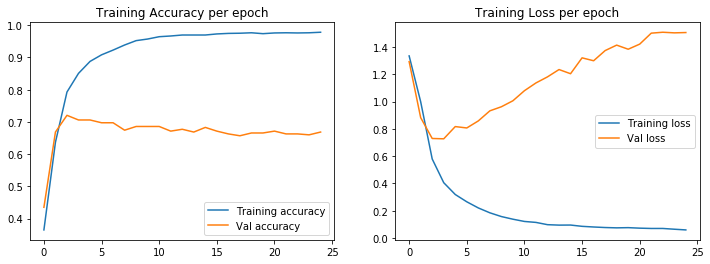

In [25]:
import pandas as pd

# load training log
training_log = pd.read_csv('./logs/training_log.csv')

train_accuracy = training_log['accuracy']
val_accuracy = training_log['val_accuracy']
train_loss = training_log['loss']
val_loss = training_log['val_loss']

# plot
plot(train_accuracy, val_accuracy, train_loss, val_loss)

#### Ans:
**It is a typical loss curve that encounters overfitting.**  

First of all, we observe the loss curve. Both training loss and validation loss decrease at the first 3 epochs. But, as the training process continues, the training loss kept decreasing and kind of converge after about 12 epochs, while the testing loss kept increasing. On the other hand, the training accuracy increases and converges after about 12 epochs. Similar to the loss curve, the validation accuracy increase in the first 3 epochs and then decreases.  

*(Knowing that loss curve and accuracy curve share an opposite trend, since the performance is better with a lower loss and higher accuracy.)*  

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

In [26]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "../DM19-Lab2-Master/GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

#### Ans:
To represent a sentence data for training the model, we have to compress the imformation of the word vectors into a vector. We can call it sentence embedding.  
1. We can utilize a sequential model such as rnn, gru or lstm. Take each words as a feature in each time step, and feed as input in sequence of the sentence to learn a sentence embedding.  
2. Also, we can simply take the mean value, or weighted sum of the word vectors as the sentence embedding.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [27]:
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

happy_words:  ['glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']


In [28]:
target_words = happy_words + angry_words + sad_words + fear_words
color = ['b', 'g', 'r', 'y']
label = ['happy words', 'angry words', 'sad words', 'fear words']

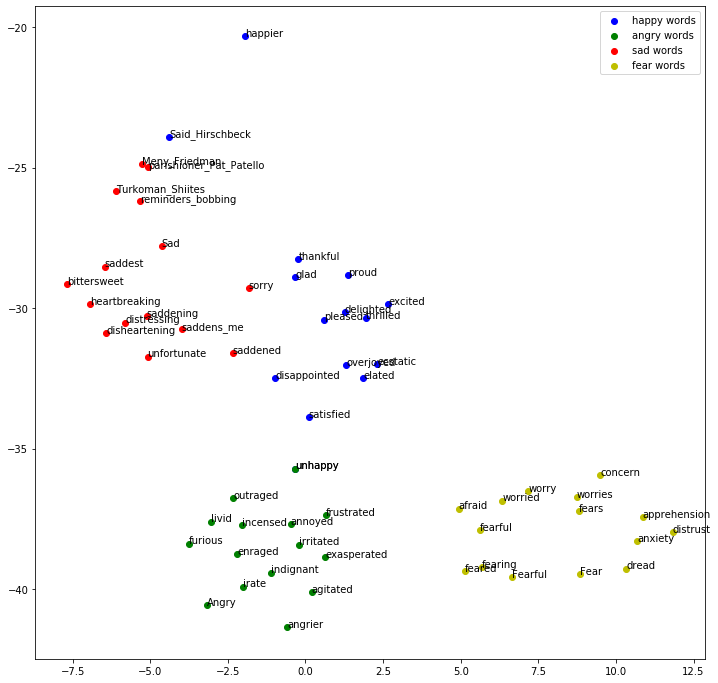

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 600
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(12, 12))
for idx, lab in enumerate(label):
    s = int(idx * topn)
    e = int((idx+1) * topn)
    plt.scatter(X_tsne[s:e, 0], X_tsne[s:e, 1], c=color[idx], label=lab)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.legend()
plt.show()

Notice that unhappy is in both happy words and angry words, which is a obvious mistake that "unhappy" is in happy words.

In [30]:
len(set(target_words))

59